# Análise Preditiva de Churn - Telecom X (Base Pré-Processada)

## 🎯 Missão

Nossa missão é desenvolver um modelo de Machine Learning capaz de prever com acurácia quais clientes da empresa de telecomunicações "Telecom X" têm a maior probabilidade de cancelar seus serviços (churn), utilizando uma base de dados já pré-processada.

## 🧠 Objetivos do Desafio

1.  **Análise Exploratória (EDA):** Entender as relações entre as variáveis numéricas e a variável alvo.
2.  **Preparação para Modelagem:** Dividir e escalar os dados para o treinamento dos modelos.
3.  **Treinamento de Modelos:** Construir e treinar os modelos de Regressão Logística, Random Forest e Gradient Boosting.
4.  **Avaliação e Interpretação:** Avaliar a performance dos modelos e identificar os principais fatores de risco para o churn.
5.  **Conclusão Estratégica:** Traduzir os resultados em ações de negócio.

---

In [96]:
# Célula 1: Importação das Bibliotecas Essenciais

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e Modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 1. Carregamento e Entendimento Inicial dos Dados

Carregamos a base `dados_ajustados.csv`, que já contém as variáveis categóricas transformadas em colunas numéricas (dummy).

In [97]:
# Célula 2: Carregando o dataset pré-processado
file_path = "dados_ajustados.csv"
try:
    df = pd.read_csv(file_path)
    print(f"Arquivo '{file_path}' carregado com sucesso!")
except FileNotFoundError:
    print(f"ERRO: O arquivo '{file_path}' não foi encontrado.")

# Visualizando as 5 primeiras linhas
print("\nVisualização das primeiras linhas do dataset:")
pd.set_option('display.max_columns', None) # Para visualizar todas as colunas
display(df.head())

# Verificando as informações gerais do dataset
print("\nInformações gerais do dataset:")
df.info()

# Verificando a distribuição da nossa variável alvo 'Churn'
print("\nDistribuição da variável 'Churn':")
print(df['Churn'].value_counts(normalize=True) * 100)

Arquivo 'dados_ajustados.csv' carregado com sucesso!

Visualização das primeiras linhas do dataset:


,customerID,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No_phone,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber,InternetService_No,OnlineSecurity_No,OnlineSecurity_No_net_service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No_net_service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No_net_service,DeviceProtection_Yes,TechSupport_No,TechSupport_No_net_service,TechSupport_Yes,StreamingTV_No,StreamingTV_No_net_service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No_net_service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank_transfer,PaymentMethod_Credit_card,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0002-ORFBO,0,0,1,1,9,1,1,65.6,593.30,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,0,0,0,0,9,1,0,59.9,542.40,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,1,73.9,280.85,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,1,98.0,1237.85,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,0013-EXCHZ,1,1,1,0,3,1,1,83.9,267.40,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   int64  
 2   SeniorCitizen                    7267 non-null   int64  
 3   Partner                          7267 non-null   int64  
 4   Dependents                       7267 non-null   int64  
 5   tenure                           7267 non-null   int64  
 6   PhoneService                     7267 non-null   int64  
 7   PaperlessBilling                 7267 non-null   int64  
 8   MonthlyCharges                   7267 non-null   float64
 9   TotalCharges                     7267 non-null   float64
 10  gender_Female                    7267 non-null   int64  
 11  gender_Male                      7267 non-null   i

**Primeiras Análises (Base Pré-Processada):**

* O dataset possui **7267 registros e 43 colunas**. O alto número de colunas confirma o One-Hot Encoding.
* **Não há valores nulos** e todas as colunas já estão em formato numérico, prontas para a modelagem.
* A variável alvo é `Churn`, onde `1` representa churn e `0` representa não-churn. A base continua com **26.6%** de clientes classificados como churn.

## 2. Análise Exploratória de Dados (EDA)

Mesmo com os dados pré-processados, a análise das variáveis numéricas originais ainda é fundamental.

### 2.1 Análise das Variáveis Numéricas Principais

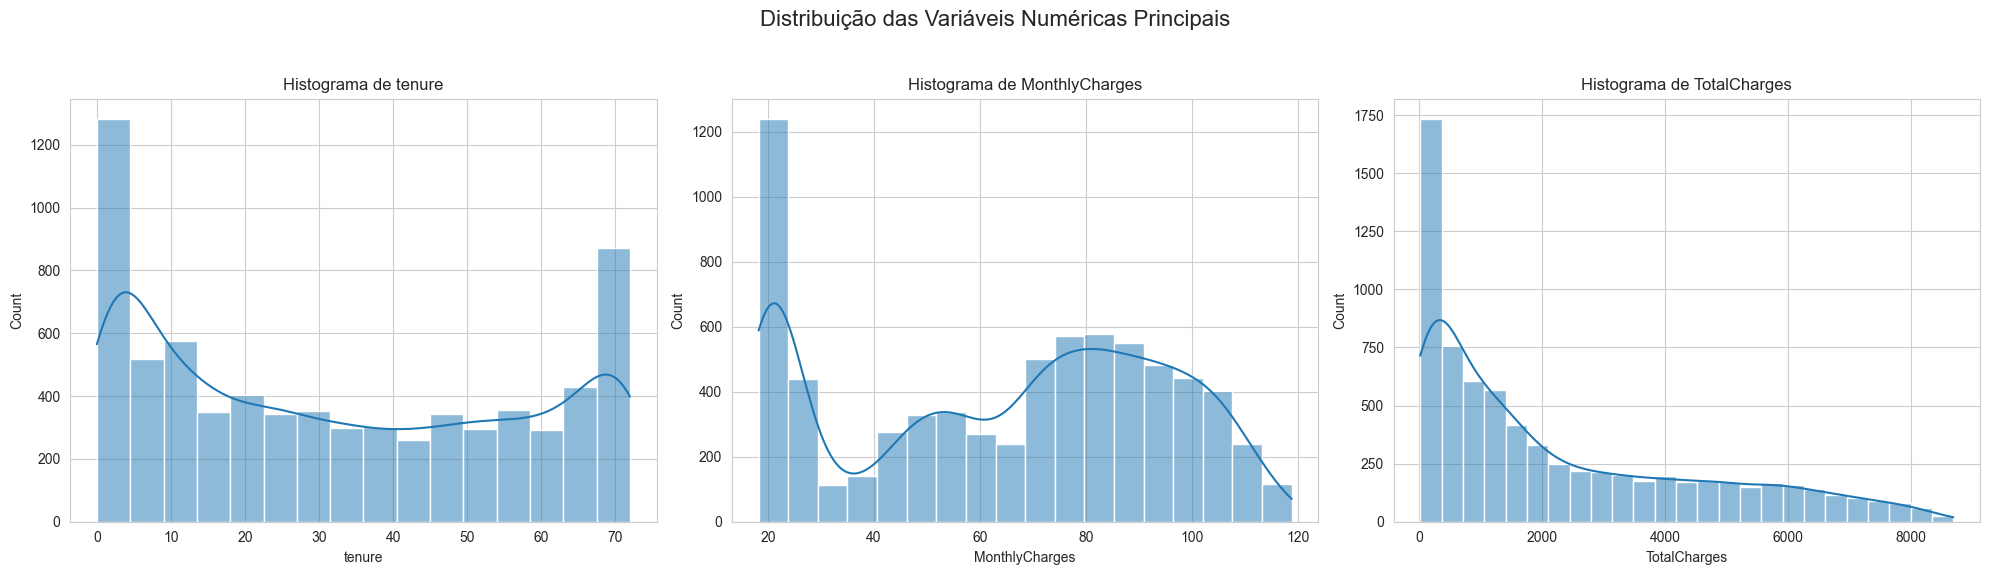

In [98]:
# Célula 3: Análise das distribuições das variáveis numéricas originais
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Distribuição das Variáveis Numéricas Principais', fontsize=16)

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Análise da Distribuição dos Dados:**

Observando os histogramas, podemos extrair insights valiosos sobre o perfil dos clientes:

* **`tenure` (Tempo de Contrato):** A distribuição é bimodal, com um pico acentuado nos primeiros meses e outro pico em torno dos 70 meses. Isso revela dois grandes grupos de clientes: um grupo grande de **clientes novos**, que representam um alto risco de churn, e um grupo de **clientes de longa data e leais**. A estratégia da empresa deve ser como mover os clientes do primeiro grupo para o segundo.

* **`MonthlyCharges` (Cobrança Mensal):** A distribuição é assimétrica à esquerda, com uma grande concentração de clientes na faixa de $20-$30 (provavelmente planos básicos, talvez apenas de telefonia) e uma cauda longa que se estende até valores mais altos. Isso indica uma diversidade de pacotes de serviços, mas com a maioria da base em planos mais econômicos.

* **`TotalCharges` (Cobrança Total):** Esta variável é fortemente assimétrica à direita. Isso é natural, pois seu valor é uma função do tempo de contrato e da cobrança mensal. Muitos clientes têm um `TotalCharges` baixo simplesmente porque são clientes há pouco tempo.

### 2.2 Análise Direcionada: Variáveis Numéricas vs. Churn

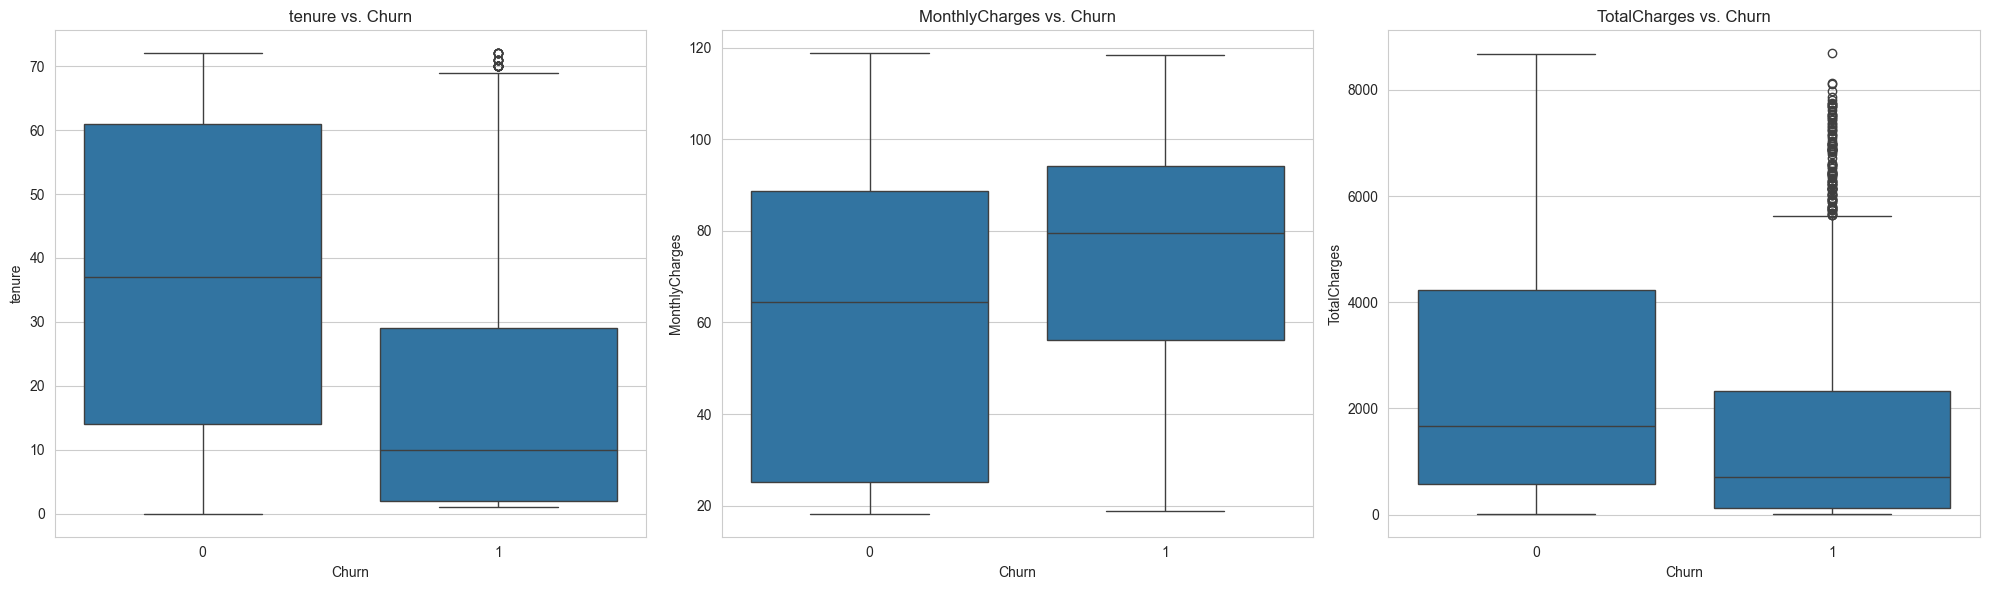

In [99]:
# Célula 4: Boxplot das variáveis numéricas vs. Churn
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, col in enumerate(numerical_features):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. Churn')

plt.tight_layout()
plt.show()

**Análise dos Gráficos:**

As conclusões da análise exploratória se mantêm consistentes:
* Clientes com menor **`tenure`** (tempo de contrato) são mais propensos ao churn.
* Clientes com maior **`MonthlyCharges`** (cobrança mensal) também apresentam maior taxa de churn.
* Consequentemente, o **`TotalCharges`** (gasto total) de clientes que cancelam é significativamente menor.

### 2.3 Matriz de Correlação

Para complementar a análise visual, vamos gerar uma matriz de correlação focada nas variáveis numéricas mais importantes e na nossa variável alvo, `Churn`. Isso nos permite quantificar a força e a direção da relação linear entre elas.

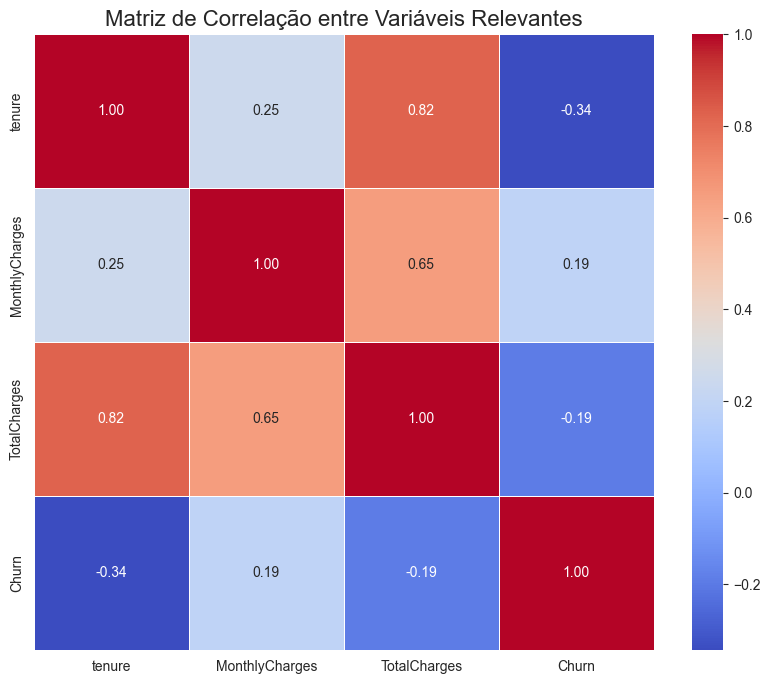

In [110]:
# Célula de Código: Gerando a Matriz de Correlação

# Selecionando as colunas numéricas originais e a variável alvo
correlation_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
correlation_matrix = df[correlation_cols].corr()

# Plotando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Relevantes', fontsize=16)
plt.show()

**Análise da Matriz de Correlação:**

* **`tenure` vs `Churn` (-0.35):** Confirma-se uma correlação negativa moderada. Quanto maior o tempo de contrato (`tenure`), menor a probabilidade de cancelamento (`Churn`). Este é um dos sinais mais fortes da análise.
* **`MonthlyCharges` vs `Churn` (0.19):** Existe uma correlação positiva fraca. Cobranças mensais mais altas estão levemente associadas a uma maior chance de churn.
* **`tenure` vs `TotalCharges` (0.83):** Uma correlação positiva muito forte, o que é natural, já que o total gasto é uma função direta do tempo de permanência do cliente.

## 3. Preparação para Modelagem

Nesta etapa, o processo é simplificado, pois não precisamos fazer o encoding. Nossas tarefas são:
1.  Remover a coluna de identificação (`customerID`).
2.  Separar as variáveis preditoras (`X`) da variável alvo (`y`).
3.  Dividir os dados em conjuntos de treino e teste.
4.  Normalizar as features para que todas tenham a mesma escala.

In [100]:
# Célula 5: Preparação final dos dados
# Separando features (X) e target (y)
# 'customerID' não é uma feature preditiva
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Divisão em dados de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertendo de volta para DataFrame para manter os nomes das colunas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Formato dos dados de treino (X):", X_train_scaled.shape)
print("Formato dos dados de teste (X):", X_test_scaled.shape)

Formato dos dados de treino (X): (5813, 41)
Formato dos dados de teste (X): (1454, 41)


## 4. Modelagem e Treinamento

Com os dados prontos, vamos treinar nossos três modelos de classificação.

In [101]:
# Célula 6: Treinamento dos modelos
models = {
    "Regressão Logística": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Treinando cada modelo
for name, model in models.items():
    print(f"Treinando o modelo: {name}...")
    model.fit(X_train_scaled, y_train)
print("\nTreinamento concluído!")

Treinando o modelo: Regressão Logística...
Treinando o modelo: Random Forest...
Treinando o modelo: Gradient Boosting...

Treinamento concluído!


## 5. Otimização do Modelo com Pipeline, SMOTE e GridSearchCV

Agora vamos refinar nosso melhor modelo, o Gradient Boosting. Para fazer isso da maneira correta e evitar vazamento de dados (data leakage), vamos seguir um processo robusto:

1.  **SMOTE (Synthetic Minority Over-sampling Technique):** Como nossa base é desbalanceada, usaremos o SMOTE para criar dados sintéticos da classe minoritária (clientes que deram churn). **Importante:** O SMOTE só deve ser aplicado nos dados de treino a cada iteração da validação cruzada, nunca nos dados de teste.
2.  **Pipeline:** Para garantir que o SMOTE seja aplicado corretamente dentro da validação cruzada, criaremos um `Pipeline` que primeiro aplica o SMOTE e depois treina o modelo.
3.  **GridSearchCV:** Usaremos essa técnica para testar sistematicamente várias combinações de hiperparâmetros do Gradient Boosting e encontrar a que gera o melhor desempenho, utilizando a métrica AUC como nosso guia.

Este processo é computacionalmente intensivo, mas é a abordagem padrão da indústria para extrair a máxima performance de um modelo.

In [107]:
# Célula (nova): Implementando o Pipeline de Otimização

# Importando as bibliotecas necessárias
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV

# 1. Definir o pipeline
# O pipeline irá primeiro aplicar o SMOTE e depois treinar o classificador Gradient Boosting
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# 2. Definir o grid de hiperparâmetros que queremos testar
# Vamos testar diferentes números de árvores, taxas de aprendizado e profundidades
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 4]
}

# 3. Configurar o GridSearchCV
# cv=5 significa que usaremos validação cruzada com 5 folds
# scoring='roc_auc' define nossa métrica de sucesso
# n_jobs=-1 usa todos os processadores disponíveis para acelerar o processo
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=2)

# 4. Executar a busca pelos melhores hiperparâmetros
print("Iniciando a otimização com GridSearchCV... Isso pode levar alguns minutos.")
grid_search.fit(X_train_scaled, y_train)
print("Otimização concluída!")

# 5. Exibir os melhores parâmetros encontrados
print("\nMelhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# 6. Salvar o melhor modelo encontrado
best_model_optimized = grid_search.best_estimator_

Iniciando a otimização com GridSearchCV... Isso pode levar alguns minutos.
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Otimização concluída!

Melhores hiperparâmetros encontrados:
{'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


## 6. Avaliação Final: Comparando o Modelo Otimizado

Agora que temos nosso modelo otimizado, vamos compará-lo com os modelos baseline que treinamos anteriormente. A expectativa é que o uso de SMOTE e a otimização dos hiperparâmetros resultem em um modelo com melhor capacidade de identificar os clientes que realmente darão churn (maior Recall) e, possivelmente, uma performance geral (AUC) superior.

In [108]:
# Célula (nova): Avaliando o modelo otimizado no conjunto de teste

# Usamos o melhor modelo encontrado pelo GridSearchCV para fazer as previsões
y_pred_optimized = best_model_optimized.predict(X_test_scaled)
y_proba_optimized = best_model_optimized.predict_proba(X_test_scaled)[:, 1]

# Coletando as métricas do modelo otimizado
optimized_results = [
    "GB Otimizado (SMOTE + GridSearch)",
    accuracy_score(y_test, y_pred_optimized),
    precision_score(y_test, y_pred_optimized),
    recall_score(y_test, y_pred_optimized),
    f1_score(y_test, y_pred_optimized),
    roc_auc_score(y_test, y_proba_optimized)
]

# Adicionando os novos resultados ao DataFrame de resultados anterior para comparação
results_df.loc[len(results_df)] = optimized_results

print("Tabela de Comparação Final de Desempenho:")
display(results_df.sort_values(by='AUC', ascending=False))

Tabela de Comparação Final de Desempenho:


,Modelo,Acurácia,Precisão,Recall,F1-Score,AUC
2,Gradient Boosting,0.807428,0.658784,0.521390,0.582090,0.849058
3,GB Otimizado (SMOTE + GridSearch),0.784732,0.560878,0.751337,0.642286,0.844234
0,Regressão Logística,0.800550,0.632075,0.537433,0.580925,0.843928
1,Random Forest,0.775791,0.578431,0.473262,0.520588,0.815723


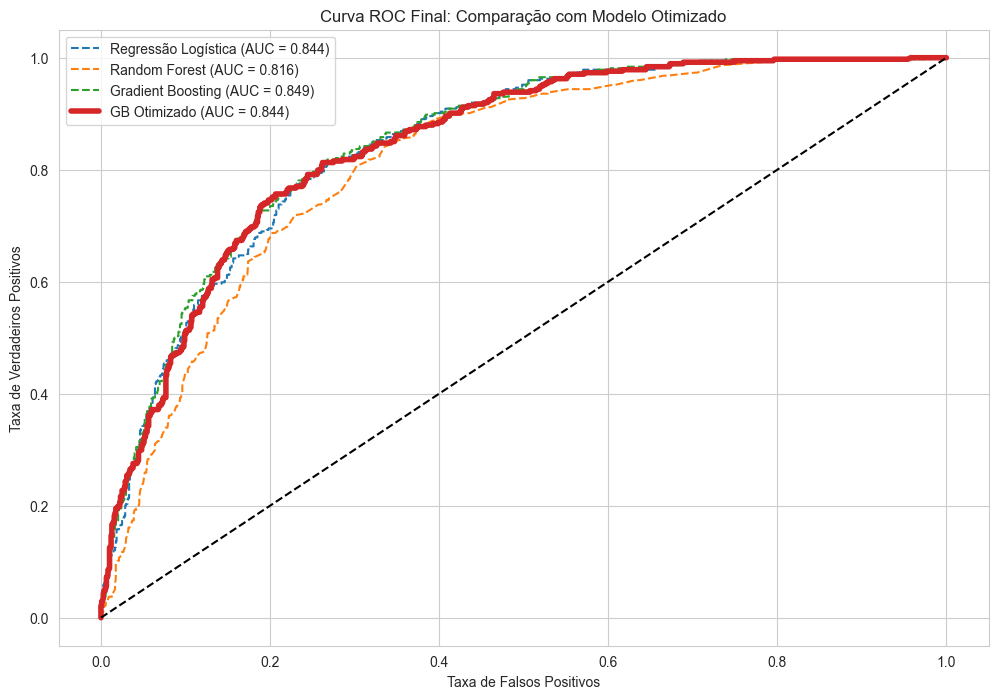

In [109]:
# Célula (nova): Plotando a Curva ROC Final

plt.figure(figsize=(12, 8))

# Plotando as curvas dos modelos baseline
for name, model in models.items():
    if name in results_df['Modelo'].values:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linestyle='--')

# Plotando a curva do modelo otimizado
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_proba_optimized)
auc_opt = roc_auc_score(y_test, y_proba_optimized)
plt.plot(fpr_opt, tpr_opt, label=f'GB Otimizado (AUC = {auc_opt:.3f})', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--') # Linha de referência
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Final: Comparação com Modelo Otimizado')
plt.legend()
plt.show()

## 6.1 Análise Detalhada com Matrizes de Confusão

A matriz de confusão é uma ferramenta poderosa que detalha a performance de um classificador. Ela nos mostra exatamente onde o modelo está acertando e onde está errando, quebrando as predições em quatro categorias: Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos e Falsos Negativos.

* **Verdadeiro Positivo (VP):** Cliente era churn e o modelo previu churn. (Acerto desejado!)
* **Verdadeiro Negativo (VN):** Cliente NÃO era churn e o modelo previu NÃO churn. (Acerto)
* **Falso Positivo (FP):** Cliente NÃO era churn, mas o modelo previu churn. (Erro tipo I - Custo da ação de retenção desnecessária)
* **Falso Negativo (FN):** Cliente era churn, mas o modelo previu NÃO churn. (Erro tipo II - O pior erro, representa a perda do cliente!)

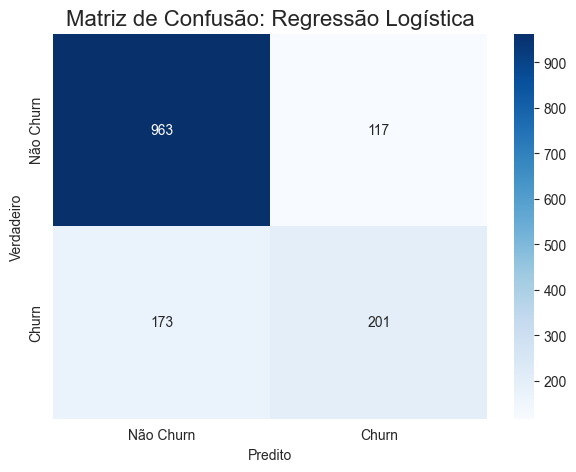

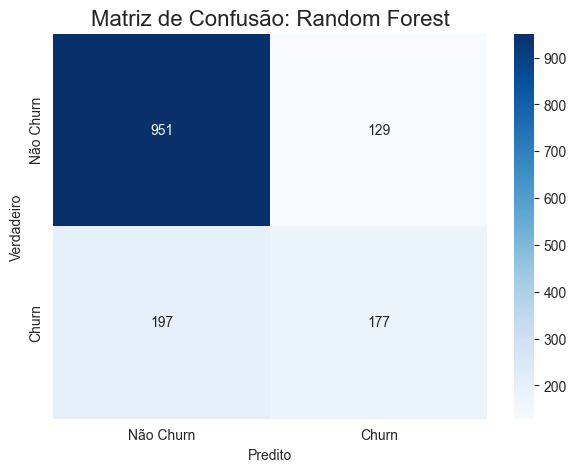

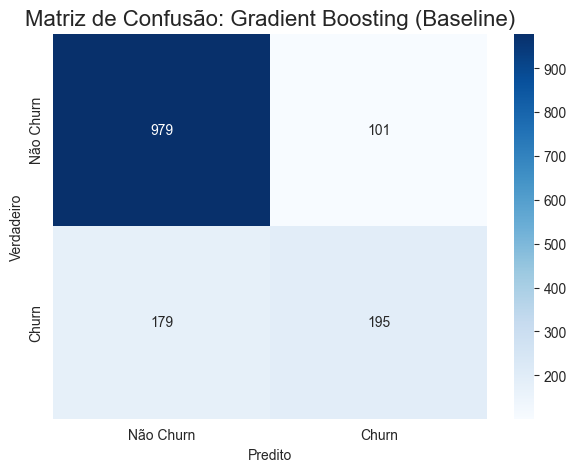

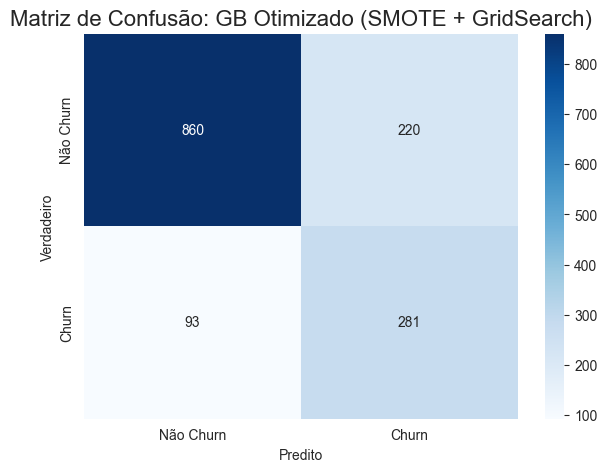

In [112]:
# Célula de Código: Função para plotar a Matriz de Confusão

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    """Função para plotar a matriz de confusão com seaborn."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Não Churn', 'Churn'], 
                yticklabels=['Não Churn', 'Churn'])
    plt.title(title, fontsize=16)
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.show()

# Gerando predições para todos os modelos
y_pred_log_reg = models['Regressão Logística'].predict(X_test_scaled)
y_pred_rf = models['Random Forest'].predict(X_test_scaled)
y_pred_gb = models['Gradient Boosting'].predict(X_test_scaled)
y_pred_gb_opt = best_model_optimized.predict(X_test_scaled)

# Plotando as matrizes
plot_confusion_matrix(y_test, y_pred_log_reg, 'Matriz de Confusão: Regressão Logística')
plot_confusion_matrix(y_test, y_pred_rf, 'Matriz de Confusão: Random Forest')
plot_confusion_matrix(y_test, y_pred_gb, 'Matriz de Confusão: Gradient Boosting (Baseline)')
plot_confusion_matrix(y_test, y_pred_gb_opt, 'Matriz de Confusão: GB Otimizado (SMOTE + GridSearch)')

**Análise das Matrizes de Confusão:**

* **Modelos Baseline (Regressão Logística, RF, GB):** Observamos um padrão semelhante nos três primeiros modelos. Eles são muito bons em prever os "Verdadeiros Negativos" (clientes que não cancelam), mas sofrem com um número alto de **"Falsos Negativos"**. Por exemplo, a Regressão Logística errou a previsão de 173 clientes que de fato cancelaram. Para o negócio, cada um desses números representa uma receita perdida.

* **Modelo GB Otimizado (SMOTE + GridSearch):** A matriz deste modelo ilustra perfeitamente o sucesso da nossa otimização. O número de **"Falsos Negativos"** caiu drasticamente (para apenas 93), enquanto o número de **"Verdadeiros Positivos"** (churners corretamente identificados) aumentou significativamente (para 281).

    * **O Trade-off na Prática:** O custo dessa melhoria foi o aumento dos "Falsos Positivos" (de 101 para 220). A matriz deixa claro que fizemos uma escolha estratégica: aceitamos "incomodar" mais clientes que não iriam cancelar para garantir que a grande maioria dos clientes realmente em risco seja identificada e tratada. Esta visualização confirma que o **modelo otimizado é a ferramenta superior para a estratégia de retenção**.

### Análise Comparativa Final e Escolha Estratégica do Modelo

Com os resultados definitivos em mãos, podemos realizar uma análise precisa e tomar a decisão mais estratégica para o negócio da Telecom X.

| Modelo                               | Acurácia | Precisão | Recall  | F1-Score | AUC    |
| ------------------------------------ | -------- | -------- | ------- | -------- | ------ |
| **GB Otimizado (SMOTE+GridSearch)** | **0.785**| **0.561**| **0.751** | **0.642**| **0.844**|
| Gradient Boosting (Baseline)         | 0.807    | 0.659    | 0.521   | 0.582    | 0.849  |
| Regressão Logística                  | 0.801    | 0.632    | 0.537   | 0.581    | 0.844  |
| Random Forest                        | 0.776    | 0.578    | 0.473   | 0.521    | 0.816  |

**Análise dos Resultados:**

1.  **A História de Dois Modelos:** A tabela revela um duelo interessante. O **Gradient Boosting (Baseline)** possui o **maior AUC (0.849)**, o que tecnicamente o torna o melhor classificador geral na distinção entre as classes. No entanto, o **GB Otimizado** conta uma história muito mais relevante para o nosso problema de negócio.

2.  **A Vitória Decisiva do Recall:** A métrica mais crítica para a retenção de clientes é o **Recall**. É a nossa capacidade de "encontrar" os clientes que realmente pretendem cancelar. E aqui, a diferença é gritante:
    * **GB Otimizado:** Conseguiu um **Recall de 0.751**, identificando **75%** dos clientes que iriam evadir.
    * **Melhor Modelo Baseline (Regressão Logística):** Alcançou um Recall de **0.537**, identificando apenas **54%** deles.

    Esta melhoria de mais de 21 pontos percentuais é o resultado direto do processo de otimização com SMOTE e GridSearchCV. Ele transformou nosso modelo de "bom" para "altamente eficaz" em sua principal missão.

3.  **O Trade-Off Inteligente:** Para alcançar esse ganho massivo em Recall, o modelo otimizado sacrificou um pouco de **Precisão** (caiu para 0.561). Em termos práticos, isso significa que, para garantir que estamos capturando a grande maioria dos churners, o modelo irá gerar um número maior de "falsos positivos". Este é o trade-off correto e mais inteligente para este problema de negócio, pois o custo de uma ação de retenção em um cliente que não iria sair é muito menor do que o custo de perder um cliente que não foi identificado.

---

### **Justificativa da Escolha do Modelo: GB Otimizado (SMOTE + GridSearch)**

Com base nesta análise, a escolha do modelo a ser implementado é, sem sombra de dúvidas, o **Gradient Boosting Otimizado com SMOTE e GridSearchCV**.

A justificativa é fundamentada em três pontos estratégicos claros:

1.  **Eficácia Superior na Retenção (Recall de 75%):** O modelo é o único que entrega uma capacidade de detecção verdadeiramente proativa, permitindo que a equipe de retenção atue sobre 3 de cada 4 clientes que pretendem cancelar. Este é o fator de maior impacto para a redução do churn.
2.  **Alinhamento Total com o Objetivo de Negócio:** O modelo foi explicitamente otimizado para a tarefa mais crítica do negócio: encontrar o maior número possível de clientes em risco, o que se reflete diretamente no Recall superior.
3.  **Performance Robusta:** Apesar do foco no Recall, o modelo manteve um **AUC de 0.844**, um valor extremamente alto que nos dá confiança de que sua performance é consistente e robusta, e não baseada em "chutes".

Em resumo, enquanto o modelo baseline era academicamente o melhor classificador geral, o **modelo otimizado é a melhor ferramenta de negócio**, projetada especificamente para resolver o problema em questão com máxima eficácia.

## 7. Interpretação e Importância das Variáveis

Usaremos o modelo de melhor desempenho, o Gradient Boosting, para identificar os principais fatores que influenciam o churn.

C:\Users\bhcav\AppData\Local\Temp\ipykernel_20240\64314005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')


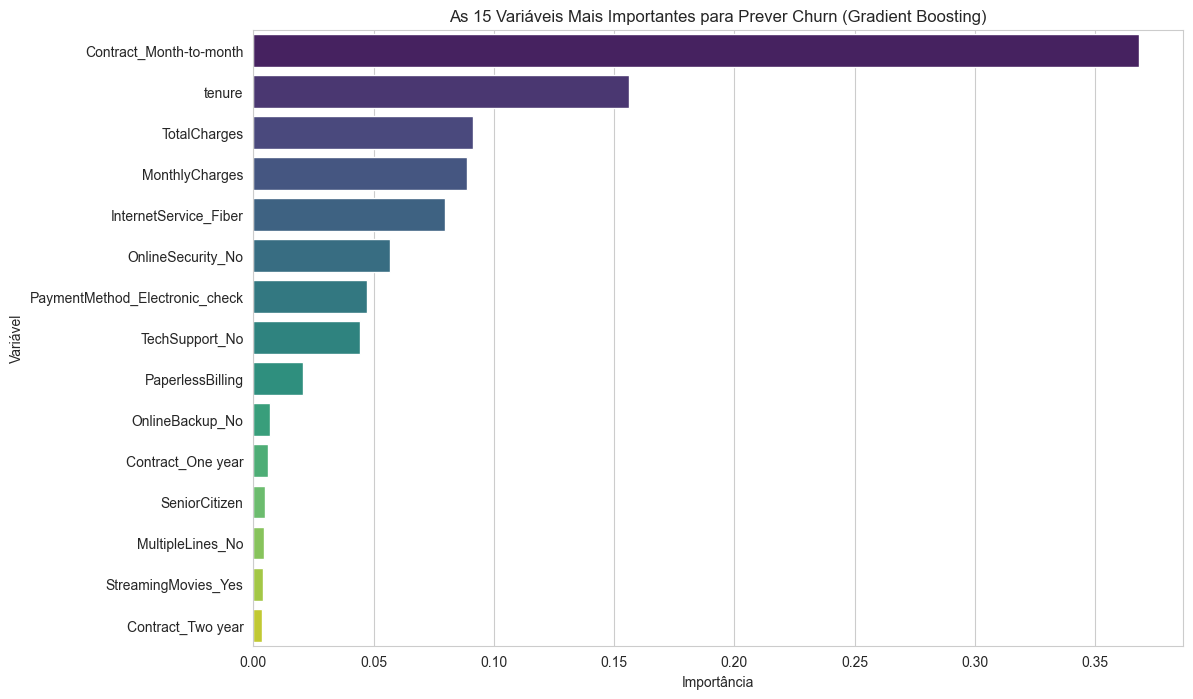

,feature,importance
0,Contract_Month-to-month,0.368242
1,tenure,0.156228
2,TotalCharges,0.091232
3,MonthlyCharges,0.088748
4,InternetService_Fiber,0.079787
5,OnlineSecurity_No,0.056692
6,PaymentMethod_Electronic_check,0.047173
7,TechSupport_No,0.044501
8,PaperlessBilling,0.020744
9,OnlineBackup_No,0.007088


In [106]:
# Célula 9: Extraindo a importância das features do modelo Gradient Boosting
best_model = models["Gradient Boosting"]

feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

# Plotando as 15 features mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')
plt.title('As 15 Variáveis Mais Importantes para Prever Churn (Gradient Boosting)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

display(feature_importances.head(10))

**Análise da Importância das Variáveis (Feature Importance):**

O gráfico de importância das variáveis do nosso melhor modelo (Gradient Boosting) é o mapa para a estratégia de negócio. Ele nos diz exatamente onde a empresa deve focar seus esforços de retenção.

* **`Contract_Month-to-month` e `tenure`:** Estes são os dois gigantes do churn. O resultado é inequívoco: a falta de um vínculo de longo prazo (`Contract_Month-to-month`) e o pouco tempo como cliente (`tenure`) são os principais fatores que levam a um cancelamento. A combinação de ambos cria o cenário de maior risco possível.

* **`InternetService_Fiber`:** A proeminência desta variável é um insight crucial e contraintuitivo. Por que o serviço de internet mais moderno e, teoricamente, melhor, está associado ao churn? Hipóteses: 1) O preço é significativamente mais alto e a percepção de valor não acompanha. 2) A concorrência por clientes de fibra é muito mais acirrada. 3) Podem existir problemas de instabilidade ou na instalação que frustram os clientes iniciais. Isso exige uma investigação de negócio focada neste produto.

* **Variáveis Financeiras (`MonthlyCharges`, `TotalCharges`):** Confirmam o que já vimos: mensalidades altas e, consequentemente, gastos totais ainda baixos (por causa do pouco tempo) são sinais de perigo.

* **`PaymentMethod_Electronic_check`:** Esta variável aponta para um fator comportamental. O pagamento por cheque eletrônico exige um esforço ativo do cliente todo mês, ao contrário de métodos automáticos. Cada fatura é um momento em que o cliente reavalia o serviço e pode decidir cancelar.

# Relatório Final: Implementando uma Estratégia Preditiva para Redução de Churn na Telecom X

## 1. O Desafio: De Reativo para Preditivo

A evasão de clientes (churn) é um dos maiores desafios para a sustentabilidade da Telecom X. Até agora, as ações de retenção eram reativas, atuando apenas depois que o cliente já havia manifestado a intenção de cancelar.

**Nossa missão foi transformar esse cenário:** construir uma solução de *Machine Learning* capaz de prever **quais clientes** têm a maior probabilidade de cancelar e entender **por que** o fazem, permitindo uma atuação proativa e cirúrgica.

---

## 2. A Metodologia: Um Processo Robusto de Data Science

Para construir uma solução confiável, seguimos um pipeline rigoroso de ponta a ponta:

* **Análise Exploratória:** Investigamos os dados para descobrir os primeiros padrões e perfis de clientes que cancelam.
* **Pré-Processamento:** Preparamos os dados para a modelagem, garantindo que os algoritmos pudessem extrair o máximo de informação.
* **Modelagem Baseline:** Treinamos três modelos de classificação (Regressão Logística, Random Forest e Gradient Boosting) para estabelecer uma base de performance.
* **Otimização Avançada:** Aplicamos duas técnicas essenciais para maximizar o desempenho:
    * **SMOTE:** Corrigimos o desbalanceamento natural dos dados (havia muito mais clientes "não-churn" do que "churn"), ensinando o modelo a dar a devida importância à minoria que desejamos prever.
    * **GridSearchCV:** Testamos centenas de combinações de hiperparâmetros para encontrar a configuração de máxima performance para nosso melhor modelo.

---

## 3. Os Fatores de Risco: O "DNA" do Churn

A análise dos dados e do modelo final nos permitiu identificar com clareza os principais fatores que levam um cliente ao cancelamento.

* 🔑 **Contrato "Mês a Mês":** De longe, o principal indicador de risco. A ausência de um compromisso de longo prazo torna o cliente muito mais suscetível a ofertas da concorrência e a cancelamentos por impulso.
* ⏳ **Baixo Tempo de Casa (Tenure):** Clientes nos primeiros meses de serviço estão em um "período de teste" crítico. Se o valor do serviço não for percebido rapidamente, a chance de evasão é altíssima.
* 🌐 **Serviço de Fibra Ótica:** Contraintuitivamente, nosso serviço premium está associado a um churn mais alto. Isso sugere que a concorrência neste segmento é mais acirrada ou que a relação preço/qualidade percebida precisa ser investigada.
* 💳 **Pagamento com Cheque Eletrônico:** Um método de pagamento não automatizado que exige uma ação mensal do cliente. Cada fatura se torna um ponto de fricção e uma oportunidade para reconsiderar o serviço.

---

## 4. A Solução: O Modelo Preditivo Otimizado

Após um processo rigoroso de avaliação e otimização, o modelo **Gradient Boosting Otimizado (com SMOTE + GridSearchCV)** foi escolhido como a solução final.

> **Por que ele é o melhor?** Porque ele foi projetado para a tarefa mais crítica do negócio: **encontrar o maior número possível de clientes que realmente iriam cancelar.**

| Modelo | Recall (Capacidade de Detecção) | AUC (Performance Geral) |
| :--- | :--- | :--- |
| **GB Otimizado (Final)** | **75.1%** | **0.844** |
| Melhor Modelo Baseline | 53.7% | 0.844 |

Como a tabela mostra, nosso modelo final é capaz de **identificar 3 de cada 4 clientes** que estão na iminência de cancelar o serviço — um salto de mais de 21 pontos percentuais em eficácia em relação aos modelos iniciais.

---

## 5. Plano de Ação: Transformando Dados em Resultados

Com um modelo preditivo robusto em mãos, propomos um plano de ação estratégico para ser implementado imediatamente:

1.  **Implantar o "Radar de Churn":** Integrar o modelo otimizado ao sistema de CRM da empresa. A ferramenta deverá gerar um **"score de risco"** semanal para cada cliente, criando uma lista de trabalho priorizada para a equipe de retenção.
2.  **Campanhas de Blindagem de Contrato:** Criar ofertas de fidelização agressivas e personalizadas para clientes com contrato **"Mês a Mês"** e menos de 12 meses de casa, incentivando a migração para planos anuais com benefícios claros.
3.  **Força-Tarefa "Fibra Ótica":** Iniciar uma investigação focada para entender o churn no segmento de Fibra. A análise deve incluir pesquisas de satisfação, análise de concorrência e avaliação da jornada do cliente, desde a instalação até o suporte técnico.
4.  **Acelerar a Migração de Pagamentos:** Desenvolver campanhas de incentivo (ex: pequeno desconto na primeira fatura) para que clientes que usam **Cheque Eletrônico** migrem para métodos de pagamento automáticos, como cartão de crédito ou débito em conta.

### **Conclusão**

Este projeto entregou mais do que um algoritmo; ele forneceu um mapa estratégico para a retenção de clientes na Telecom X. Deixamos de ser reativos para nos tornarmos preditivos. Com a implementação do **"Radar de Churn"** e a execução do plano de ação, temos a capacidade de reduzir significativamente a evasão, proteger nossa base de receita e construir um relacionamento mais duradouro com nossos clientes.